In [1]:
# Basic imports 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import networkx as nx


import teaspoon as tsp # Install with -> pip install teaspoon

# TALK TO AUDUN ABOUT IMPORTING ALL
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw


# scikit-tda imports..... Install all with -> pip install scikit-tda
import ripser

# Computing persistence on a finite metric space

This covers point clouds in R^n inheriting Euclidean metric, as well as any other proximity or distance measure. 

[0, 2, 0, 2]

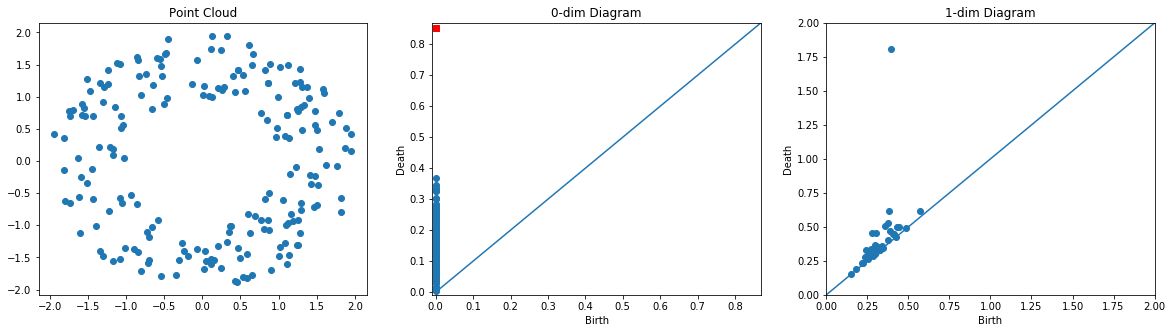

In [2]:
r = 1
R = 2

P = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

# Draw point cloud 
plt.sca(axes[0])
plt.title('Point Cloud')
plt.scatter(P[:,0],P[:,1])

# Draw diagrams
plt.sca(axes[1])
plt.title('0-dim Diagram')
Draw.drawDgm(diagrams[0])

plt.sca(axes[2])
plt.title('1-dim Diagram')
Draw.drawDgm(diagrams[1])
plt.axis([0,R,0,R])

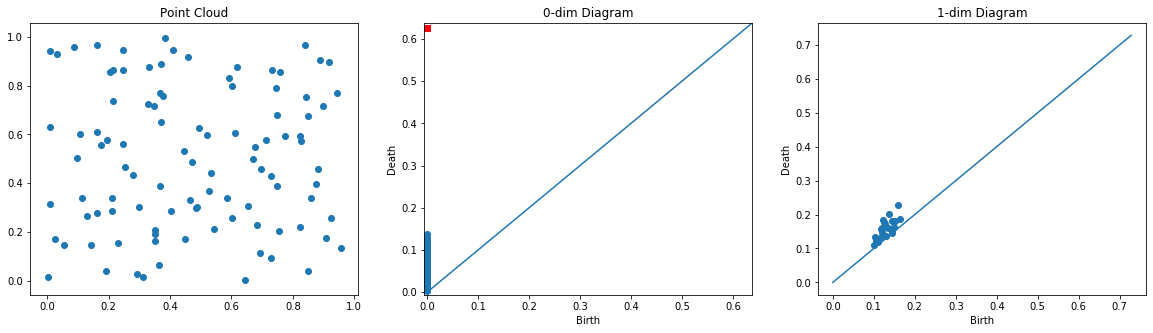

In [3]:
P = makePtCloud.Cube()
diagrams = ripser.ripser(P)['dgms']

# Draw stuff
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
plt.sca(axes[0])
plt.title('Point Cloud')
plt.scatter(P[:,0],P[:,1])
plt.sca(axes[1])
plt.title('0-dim Diagram')
Draw.drawDgm(diagrams[0])
plt.sca(axes[2])
plt.title('1-dim Diagram')
Draw.drawDgm(diagrams[1])

# Computing persistence for a weighted graph as the 1-skeleton

V1 Just doing the clique complex 

Most useful/interesting when we have a decently dense graph

In [4]:
n = 10
p = .4

# Generate random graph 
G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

m = len(G.edges)
print('There are', m,'edges.')

# Generate random edge weights in the interval [0,maxWeight]
maxWeight = 100
weights = np.random.randint(maxWeight, size = m)

for i, e in enumerate(G.edges()):
    G[e[0]][e[1]] ['weight'] = weights[i]



There are 17 edges.


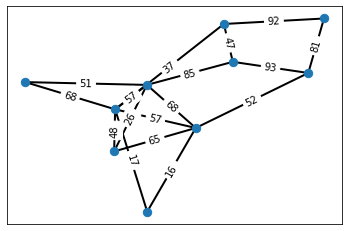

In [5]:
#draw it!

pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)

# edges
nx.draw_networkx_edges(G, pos,  width=2)
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# )

# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G, 'weight'))

In [8]:
# %matplotlib notebook
# from ipywidgets import *


# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.sin(x))

# def update(w = 1.0):
#     line.set_ydata(np.sin(w * x))
#     fig.canvas.draw_idle()

# interact(update);
# plt.show()

In [7]:
# V2 Vietoris Rips of the metric graph 